In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tracks = pd.read_csv('../data/spotify_daily_charts_tracks.csv')
df_dc = pd.read_csv('../data/spotify_daily_charts.csv')
df_artists = pd.read_csv('../data/spotify_daily_charts_artists.csv')

In [3]:
df_dc_copy = df_dc.copy()
df_artists = df_artists.copy()
df_tracks = df_tracks.copy()

In [4]:
similar_artists = []
for index, row in df_artists[df_artists.genres.str.contains('indie|rock')].iterrows():
    artist_genres = set()
    for genre in row['genres'].split():
        artist_genres.add(genre.strip("\'[],"))
    if 'pinoy' in artist_genres:
        similar_artists.append(row['artist_name'])

In [5]:
df_dc = df_dc.set_index('date')
df_dc.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [6]:
similar_artists

['SUD',
 'Silent Sanctuary',
 'Up Dharma Down',
 'Moonstar88',
 '6cyclemind',
 'Eraserheads',
 'Hale',
 'Leanne & Naara',
 'Callalily',
 'Sponge Cola',
 'Kiana V',
 'Mayonnaise',
 'Parokya Ni Edgar',
 'Rivermaya',
 'Clara Benin',
 'Kamikazee',
 'Orange & Lemons',
 'IV Of Spades',
 'Autotelic',
 'Gracenote',
 'The Itchyworms',
 'Unique Salonga',
 'I Belong to the Zoo',
 'Imago',
 'juan karlos',
 'Midnight Meetings',
 'Reese Lansangan',
 'Paolo Sandejas',
 'Alisson Shore',
 'Join The Club',
 'Agsunta',
 'Reneé Dominique',
 'Arthur Nery',
 'Ace Banzuelo',
 'Rob Deniel',
 'Ebe Dancel',
 'Slapshock']

In [7]:
similar_artists = df_artists[df_artists.artist_name.isin(similar_artists)].artist_id.to_list()

In [8]:
df_first_stream = pd.DataFrame(df_dc.reset_index().groupby('track_id')['date'].min())
df_first_stream.columns = ['first_stream']

In [9]:
df_dc = df_dc.reset_index().merge(df_first_stream, on='track_id').set_index('date')

In [10]:
df_dc

,position,track_id,track_name,artist,streams,first_stream
date,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,2017-01-01
2017-01-02,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,218117,2017-01-01
2017-01-03,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,237065,2017-01-01
2017-01-04,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,238409,2017-01-01
2017-01-05,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,244616,2017-01-01
...,...,...,...,...,...,...
2021-01-14,174,4Yxc55NX3tAXC2mHRAhtcW,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,30105,2021-01-14
2021-01-15,173,4Yxc55NX3tAXC2mHRAhtcW,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,30198,2021-01-14
2021-01-15,21,3jjBPF4NDMCU51psU8JPpR,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...",Ariana Grande,98123,2021-01-15


In [11]:
# dataframe of total streams of track charting prior to 2020-11-01
total_streams = pd.DataFrame(df_dc[df_dc.first_stream <= '2020-11-01'].groupby('track_id')['streams'].sum())

In [12]:
df_merged = total_streams.merge(df_tracks, on='track_id')

In [13]:
df_merged = df_merged.merge(df_artists[['total_followers', 'artist_id']], on='artist_id')

In [14]:
df_merged[df_merged.duplicated()]

,track_id,streams,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers


In [15]:
# drop tracks w na
is_na = df_merged[df_merged.isnull().any(1)].index.to_list()
df_merged.drop(is_na, inplace=True)

In [16]:
df_merged

,track_id,streams,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers
0,000xQL6tZNLJzIrtIgxqSl,2708061,Still Got Time (feat. PARTYNEXTDOOR),5ZsFI1h6hIdQRw2ti0hz81,ZAYN,2kGUeTGnkLOYlinKRJe47G,188490,2017-03-23,65,0.748,...,7,-6.029,1,0.0639,0.1310,0.000000,0.0852,0.5240,120.963,14121084
1,0PDUDa38GO8lMxLCRc4lL1,504239,PILLOWTALK,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,5amj9zNeZ3B2EdpBgXrOZ0,202746,2016-03-25,81,0.584,...,11,-4.275,1,0.0456,0.1170,0.000000,0.0939,0.4380,124.944,14121084
2,0aVsVsOYDSEEigiwTrIab9,605913,Let Me,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,37PlDQrSCWOiQlrA1AvUqx,185373,2018-12-13,24,0.460,...,9,-5.637,1,0.0502,0.2390,0.000006,0.0967,0.1890,168.408,14121084
3,1dLXLETYiZohIZWnse4ypG,4726443,Better,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,7MkNlHw0O8KKr3yJ3RtgVW,174516,2020-09-25,82,0.637,...,2,-7.137,1,0.3010,0.3530,0.000000,0.1310,0.0807,84.295,14121084
4,1iWHabUgUuuKLBa0TzTHfk,20977283,"A Whole New World (End Title) - From ""Aladdin""",5ZsFI1h6hIdQRw2ti0hz81,ZAYN,1m8eXQqp3QCQyR56fgbm6o,242956,2019-05-09,73,0.302,...,2,-8.160,1,0.0319,0.0575,0.000000,0.0861,0.1050,110.508,14121084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,7wFybC8jBH3zE139OpCtpG,777260,Lost in the Fire,3hteYQFiMFbJY7wS0xDymP,Gesaffelstein,3gXi45Aift9hCoB6lvuVJb,202093,2019,1,0.663,...,2,-12.159,1,0.0359,0.0863,0.001330,0.1170,0.1760,101.004,364576
3140,7x5xYW5W42OGPAdHUyyguy,11209,Locked Away (feat. Adam Levine),4TH4BHy0LdBi3dpBW4P2UX,R. City,4AUTMNSP56xicSznzKgzjB,227480,2015-10-09,76,0.509,...,1,-5.709,1,0.0678,0.3040,0.000000,0.0452,0.5500,118.413,117048
3141,7yqkSfpsdd0R1mMlOQ7t3b,269903,One I Love,2KU7pJgPoJC3uwJRZPYQ8G,BATE,4WThDxiHS8ms8P1SibZYLB,220566,2018-02-09,0,0.575,...,3,-4.293,1,0.0445,0.0259,0.000015,0.0925,0.1390,149.965,1284
3142,7yyRTcZmCiyzzJlNzGC9Ol,677723,Broccoli (feat. Lil Yachty),5M0lbkGluOPXLeFjApw8r8,Shelley FKA DRAM,0NrZHZ0y5kTO8EHliuUUca,225205,2016-10-21,70,0.886,...,8,-7.390,1,0.1310,0.2360,0.000000,0.0570,0.7080,145.990,792953


In [21]:
# Use only tracks with similar artist
df_merged = df_merged[df_merged.artist_id.isin(similar_artists)]

In [22]:
df_merged.set_index('track_id', inplace=True)

KeyError: "None of ['track_id'] are in the columns"

In [23]:
df_merged['duration'].describe()

count       110.000000
mean     266996.072727
std       50637.594030
min      154709.000000
25%      239648.250000
50%      260599.000000
75%      295279.750000
max      447333.000000
Name: duration, dtype: float64

In [24]:
df_merged

,streams,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers
track_id,,,,,,,,,,,,,,,,,,,,
0087fDVeNhuyMtST91RMjv,1479905,Kundiman,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,08SEZDvRXrrNs1C2y73MLi,339053,2007,63,0.335,0.5710,11,-4.711,1,0.0243,0.564,0.000000,0.1370,0.454,93.572,1920605
0YyM8aEdbjGfLWPn6fdcn7,55579511,Pasensya Ka Na,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,241029,2015-04-08,65,0.696,0.2620,11,-15.073,1,0.0310,0.519,0.000000,0.0669,0.265,84.007,1920605
1JhRlvSiWkOk8tlUj43ahm,7195356,Malayo Na Tayo,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,6wWkX6S5Ly2VFT43euTsda,239143,2017-09-29,48,0.461,0.3190,9,-9.085,1,0.0259,0.380,0.000000,0.2570,0.438,157.927,1920605
29xs643Q96uQLD8f7SxYYw,31820515,Sa'yo,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,4xxRoePLdITFIhrzUhmOaQ,253360,2013-06-11,63,0.567,0.0896,5,-12.944,1,0.0343,0.796,0.000000,0.2180,0.367,79.002,1920605
2Gt5SmbyQjcjEqMOdEd3QE,9519469,Dahilan,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,3Y4DF0OVRgB6sXE0mBZjak,234722,2019-08-02,51,0.630,0.4030,11,-10.350,1,0.0273,0.536,0.000023,0.1780,0.509,80.016,1920605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5UhpceEr5XmbVwyoIUIRnh,38638323,Hanggang Kailan - Umuwi Ka Na Baby,1EUmQM6xgUQLUkJVcvSdey,Orange & Lemons,0S0yaR1MiuHfyAZPAtChVc,261866,2005-03-24,65,0.556,0.6740,0,-5.563,1,0.0296,0.116,0.000002,0.2260,0.399,146.433,436418
60LTEqwQF7J0mO093FPRdc,55972,Does She Know,1DZGAZcaTA32eLJELEsjXY,Kiana V,0JxHUM5fNfidbMcevMDDpn,231578,2017-02-10,49,0.746,0.6440,1,-7.498,1,0.2090,0.154,0.000000,0.0923,0.668,114.113,32656
6NwUkPYT2BAkfDM5nCRLyi,19332,Parallel Universe,5ebPSE9YI5aLeZ1Z2gkqjn,Clara Benin,2706ROvc9Zl53lUszds8Li,264000,2017-11-24,0,0.534,0.0250,4,-18.859,1,0.0374,0.581,0.000020,0.1080,0.179,134.427,88686


In [25]:
from sklearn.preprocessing import StandardScaler

# Scale Duration, Loudness, Tempo, and total_followers
col_names = ['duration', 'loudness', 'tempo', 'total_followers']
features = df_merged[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_merged[col_names] = features
df_merged

<ipython-input-25-3cee3f15a456>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged[col_names] = features
c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,streams,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers
track_id,,,,,,,,,,,,,,,,,,,,
0087fDVeNhuyMtST91RMjv,1479905,Kundiman,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,08SEZDvRXrrNs1C2y73MLi,1.429505,2007,63,0.335,0.5710,11,1.325314,1,0.0243,0.564,0.000000,0.1370,0.454,-1.032591,1.604643
0YyM8aEdbjGfLWPn6fdcn7,55579511,Pasensya Ka Na,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,-0.515149,2015-04-08,65,0.696,0.2620,11,-2.172308,1,0.0310,0.519,0.000000,0.0669,0.265,-1.392382,1.604643
1JhRlvSiWkOk8tlUj43ahm,7195356,Malayo Na Tayo,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,6wWkX6S5Ly2VFT43euTsda,-0.552565,2017-09-29,48,0.461,0.3190,9,-0.151100,1,0.0259,0.380,0.000000,0.2570,0.438,1.388146,1.604643
29xs643Q96uQLD8f7SxYYw,31820515,Sa'yo,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,4xxRoePLdITFIhrzUhmOaQ,-0.270520,2013-06-11,63,0.567,0.0896,5,-1.453679,1,0.0343,0.796,0.000000,0.2180,0.367,-1.580647,1.604643
2Gt5SmbyQjcjEqMOdEd3QE,9519469,Dahilan,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,3Y4DF0OVRgB6sXE0mBZjak,-0.640271,2019-08-02,51,0.630,0.4030,11,-0.578092,1,0.0273,0.536,0.000023,0.1780,0.509,-1.542505,1.604643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5UhpceEr5XmbVwyoIUIRnh,38638323,Hanggang Kailan - Umuwi Ka Na Baby,1EUmQM6xgUQLUkJVcvSdey,Orange & Lemons,0S0yaR1MiuHfyAZPAtChVc,-0.101773,2005-03-24,65,0.556,0.6740,0,1.037727,1,0.0296,0.116,0.000002,0.2260,0.399,0.955795,-0.609194
60LTEqwQF7J0mO093FPRdc,55972,Does She Know,1DZGAZcaTA32eLJELEsjXY,Kiana V,0JxHUM5fNfidbMcevMDDpn,-0.702643,2017-02-10,49,0.746,0.6440,1,0.384581,1,0.2090,0.154,0.000000,0.0923,0.668,-0.259934,-1.211452
6NwUkPYT2BAkfDM5nCRLyi,19332,Parallel Universe,5ebPSE9YI5aLeZ1Z2gkqjn,Clara Benin,2706ROvc9Zl53lUszds8Li,-0.059438,2017-11-24,0,0.534,0.0250,4,-3.450247,1,0.0374,0.581,0.000020,0.1080,0.179,0.504185,-1.127877


## Split data into train and test

In [26]:
# Create feature and target dataset
X = df_merged[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
              'instrumentalness', 'liveness', 'valence', 'tempo', 'total_followers']]
y = df_merged['streams']

In [27]:
X.shape, y.shape

((110, 11), (110,))

In [28]:
X.describe()

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers
count,1.100000e+02,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02,1.100000e+02
mean,-5.249589e-16,0.560027,0.500333,6.863197e-17,0.047012,0.389946,0.004955,0.157268,0.431482,3.431598e-16,3.633457e-17
std,1.004577e+00,0.135269,0.196271,1.004577e+00,0.057023,0.289403,0.016246,0.096982,0.207326,1.004577e+00,1.004577e+00
min,-2.227613e+00,0.229000,0.025000,-4.539836e+00,0.023200,0.000045,0.000000,0.033800,0.114000,-2.574821e+00,-1.255090e+00
25%,-5.425413e-01,0.493250,0.371500,-4.801199e-01,0.029075,0.132750,0.000000,0.097450,0.265250,-6.033340e-01,-1.016474e+00
50%,-1.269087e-01,0.560500,0.498000,1.083023e-01,0.034450,0.398000,0.000005,0.117500,0.415000,9.805985e-03,-3.044095e-01
75%,5.611073e-01,0.659250,0.620750,6.060097e-01,0.041200,0.619750,0.000484,0.193500,0.567750,7.125834e-01,8.505565e-01
max,3.577624e+00,0.853000,0.969000,1.975422e+00,0.555000,0.961000,0.136000,0.688000,0.965000,2.547339e+00,1.946863e+00


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82, 11), (28, 11), (82,), (28,))

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, X.shape[1]))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [32]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004886,6.177832e-04,0.001563,4.786691e-04,2,{'n_features_to_select': 2},-2.854378,0.055893,-0.284453,-0.001544,...,-0.671546,1.100119,1,0.064267,0.159457,0.029110,0.021963,0.029592,0.060878,0.051443
1,0.004104,3.908158e-04,0.001564,4.791557e-04,3,{'n_features_to_select': 3},-3.284794,0.038930,-0.363933,0.031082,...,-0.756673,1.273099,2,0.139588,0.163969,0.098176,0.053281,0.109848,0.112972,0.037685
2,0.004104,3.906012e-04,0.001173,3.911258e-04,4,{'n_features_to_select': 4},-3.506262,0.036729,-0.223058,0.042253,...,-0.877966,1.344581,5,0.141619,0.192462,0.107225,0.060040,0.219224,0.144114,0.057297
3,0.003909,2.780415e-07,0.000977,1.784161e-07,5,{'n_features_to_select': 5},-3.565131,0.004347,-0.150150,0.106656,...,-0.864727,1.380059,4,0.165897,0.204254,0.160114,0.095110,0.221790,0.169433,0.043765
4,0.003127,3.908875e-04,0.001173,3.909826e-04,6,{'n_features_to_select': 6},-3.428006,0.002755,-0.157035,0.118438,...,-0.822485,1.328771,3,0.166772,0.204278,0.162925,0.105732,0.233541,0.174649,0.043117
5,0.003127,3.908397e-04,0.000977,4.523674e-07,7,{'n_features_to_select': 7},-6.482408,-0.075268,-0.154406,0.211802,...,-1.421880,2.543946,8,0.244694,0.299343,0.163243,0.125926,0.238106,0.214263,0.061870
6,0.002540,4.786302e-04,0.001173,3.907681e-04,8,{'n_features_to_select': 8},-6.569626,-0.077280,-0.141730,0.318411,...,-1.384667,2.604082,7,0.245026,0.299468,0.258546,0.162989,0.297707,0.252747,0.049707
7,0.002931,3.568323e-07,0.000977,2.336015e-07,9,{'n_features_to_select': 9},-6.678284,-0.102153,-0.030056,0.395051,...,-1.344533,2.676655,6,0.294366,0.317609,0.284782,0.190796,0.331070,0.283725,0.049274
8,0.001954,6.217196e-07,0.001172,3.905773e-04,10,{'n_features_to_select': 10},-8.391485,0.004875,-0.072181,0.362878,...,-1.726185,3.344894,9,0.321636,0.334291,0.314856,0.223523,0.336858,0.306233,0.042137


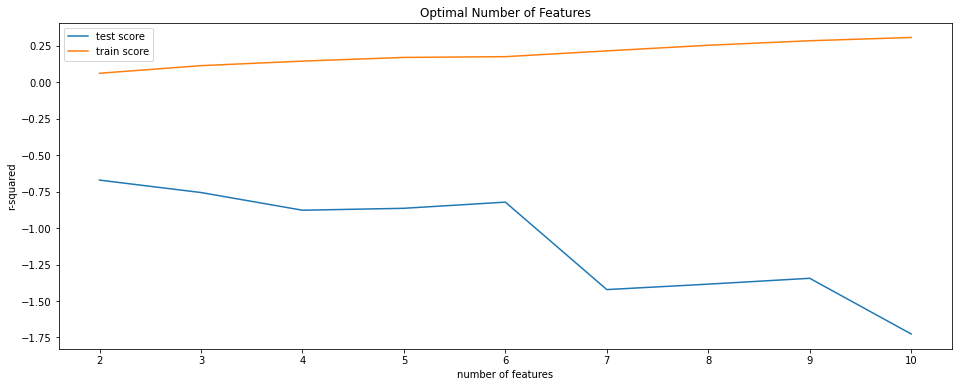

In [33]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [34]:
pred = model_cv.best_estimator_.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 11468131.10400835
Mean Squared Error: 425818277526117.3
Root Mean Squared Error: 20635364.72966052


In [36]:
y_test.describe()

count    2.800000e+01
mean     1.058731e+07
std      2.213990e+07
min      1.880900e+04
25%      1.567190e+05
50%      2.390212e+06
75%      1.264280e+07
max      1.101540e+08
Name: streams, dtype: float64

## Random Forest Classifier

In [37]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=10)

In [39]:
best_model = rf_random.best_estimator_

In [40]:
pred = best_model.predict(X_test)

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 13157034.576230276
Mean Squared Error: 435955565635477.44
Root Mean Squared Error: 20879548.980652753


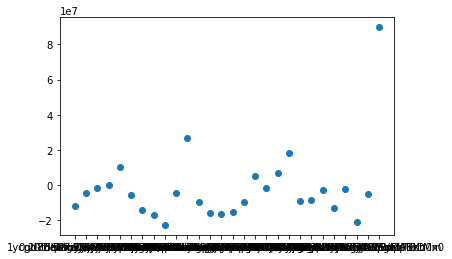

In [42]:
plt.plot(y_test-pred, marker='o', linestyle='')

<BarContainer object of 11 artists>

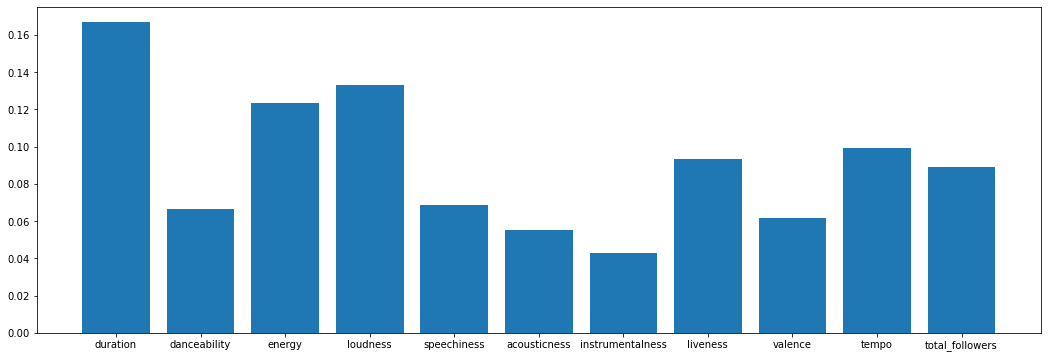

In [43]:
fig = plt.figure(figsize=(18,6))
plt.bar(x=X.columns, height=best_model.feature_importances_)

In [51]:
results = pd.DataFrame(y_test)
results['predicted'] = pred
results

,streams,predicted
track_id,,
1ycpU8beNm9bXKvy7s25Jl,1764592,1.379293e+07
0gdYUlrMgRS9HfBX37EoVf,21493,4.368171e+06
2Gt5SmbyQjcjEqMOdEd3QE,9519469,1.136344e+07
7IqUmDJ2GjaOqrzDCXhrV5,7818064,7.444071e+06
5eFzCfsj3d0yWumdEldZwL,14869764,4.363781e+06
1xixJwhW5UOOnXpN7GNsPg,105398,5.848176e+06
0GGfPhGuWC2JGc7hlvjLXa,173826,1.414886e+07
6y0BUUOjU4TtqoBwoFwcvU,3015831,1.997567e+07
2vVW17crZs4KInids0h9SE,41130,2.257234e+07


In [80]:
results['accuracy'] = abs((results['streams'] - results['predicted']) / results['streams'])*100

In [81]:
results.merge(df_tracks[['track_name', 'track_id', 'artist_name']], on='track_id').sort_values('accuracy')

,track_id,streams,predicted,accuracy,track_name,artist_name
3,7IqUmDJ2GjaOqrzDCXhrV5,7818064,7.444071e+06,4.783698,Ipagpatawad Mo,Mayonnaise
2,2Gt5SmbyQjcjEqMOdEd3QE,9519469,1.136344e+07,19.370545,Dahilan,Silent Sanctuary
16,63qA4ydokzNOFpsaNlsYsC,15125162,9.873290e+06,34.722746,Higa,Arthur Nery
17,6sl4KzZ9PRb8xTzjYIrHAP,4218297,5.915239e+06,40.228121,Someday,Leanne & Naara
26,4UgtdWy4dm7vMVIupUbtMm,12748462,1.793774e+07,40.705118,Huling Sayaw - Acoustic,Kamikazee
24,652CegYwXhnFnVz3SgGzTO,4032985,5.982199e+06,48.331789,Ilaw Sa Daan,IV Of Spades
18,6TbDpqKCksZNJjriFhPum8,12607586,5.626427e+06,55.372684,Could I Love You Any More (feat. Jason Mraz),Reneé Dominique
10,3OpGUlDmRUXh0NkIYWoIlD,46035863,1.927296e+07,58.134900,Your Song,Parokya Ni Edgar
19,0HZ3OUVrGHxttD2EuHqRm3,30360968,1.218022e+07,59.881974,The Day You Said Goodnight,Hale
22,637uCaC8im9B7Pe2O2Z53w,4771356,7.696530e+06,61.306979,Sino,Unique Salonga


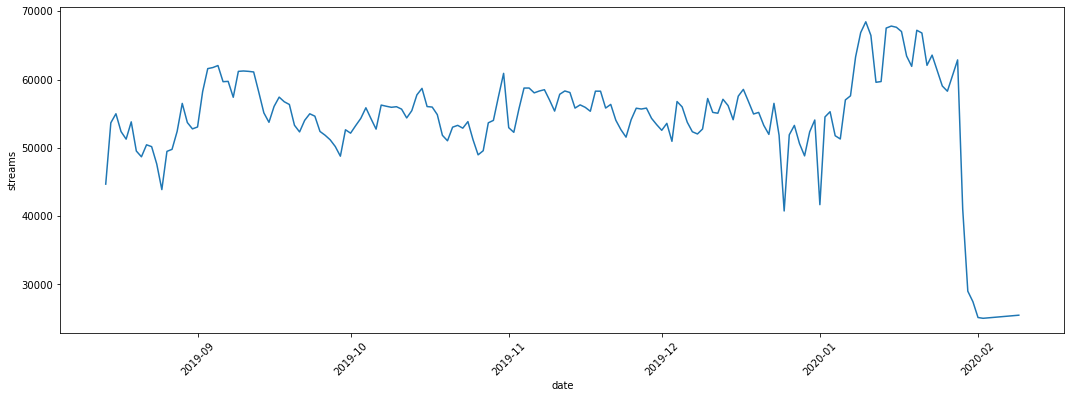

In [72]:
temp = data=df_dc[df_dc['track_name'] == 'Dahilan'].reset_index()
temp['date'] = pd.to_datetime(temp['date'])
fig = plt.figure(figsize=(18,6))
g = sns.lineplot(data=temp, x='date', y='streams')
plt.xticks(rotation=45);

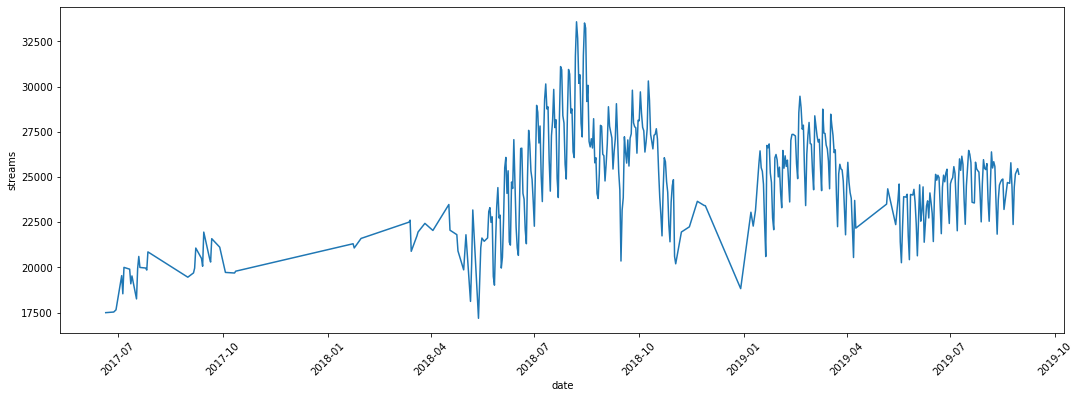

In [71]:
temp = data=df_dc[df_dc['track_name'] == 'Ipagpatawad Mo'].reset_index()
temp['date'] = pd.to_datetime(temp['date'])
fig = plt.figure(figsize=(18,6))
g = sns.lineplot(data=temp, x='date', y='streams')
plt.xticks(rotation=45);

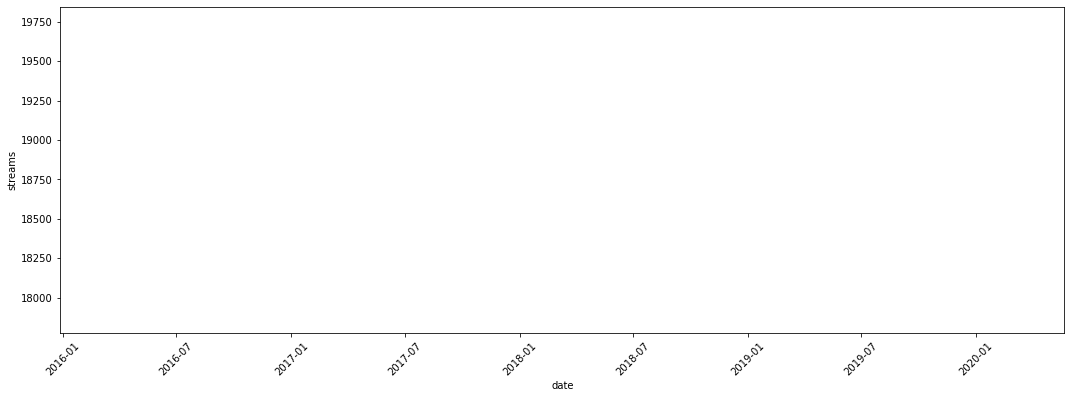

In [75]:
temp = data=df_dc[df_dc['track_name'] == 'Halaga'].reset_index()
temp['date'] = pd.to_datetime(temp['date'])
fig = plt.figure(figsize=(18,6))
g = sns.lineplot(data=temp, x='date', y='streams')
plt.xticks(rotation=45);

In [77]:
df_tracks[df_tracks['track_name'] == 'Halaga']

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1195,6pz4tdLoIDJdnpXnisSDCK,Halaga,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,58vdgBfvgzQFZ2VreSPGmU,352120,1999,62,0.489,0.57,2,-9.197,1,0.0364,0.132,0.000001,0.274,0.643,134.486


In [79]:
df_dc[df_dc['track_name'] == 'Take That Man']

,position,track_id,track_name,artist,streams,first_stream
date,,,,,,
2018-12-28,178,0gdYUlrMgRS9HfBX37EoVf,Take That Man,IV Of Spades,21493,2018-12-28
2019-01-18,129,1SZuNx9TtE5da7twgYkKAq,Take That Man,IV Of Spades,29172,2019-01-18
2019-01-19,142,1SZuNx9TtE5da7twgYkKAq,Take That Man,IV Of Spades,25846,2019-01-18
2019-01-20,159,1SZuNx9TtE5da7twgYkKAq,Take That Man,IV Of Spades,23143,2019-01-18
2019-01-21,176,1SZuNx9TtE5da7twgYkKAq,Take That Man,IV Of Spades,24873,2019-01-18


c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='streams'>

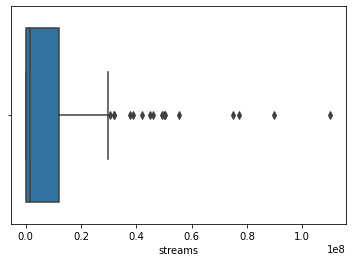

In [83]:
sns.boxplot(df_merged['streams'])